# InferSent Training NLI

In [1]:
# import stuff
%load_ext autoreload
%autoreload 2
%matplotlib inline

from random import randint

import numpy as np
import torch

# Load encoder Glove

In [2]:
# Load model
from models import InferSent
model_version = 1
MODEL_PATH = "../encoder/infersent%s.pkl" % model_version
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
infersent = InferSent(params_model)
infersent.load_state_dict(torch.load(MODEL_PATH))

In [3]:
# Keep it on CPU or put it on GPU
use_cuda = False
infersent = infersent.cuda() if use_cuda else infersent

In [4]:
# If infersent1 -> use GloVe embeddings. If infersent2 -> use InferSent embeddings.
W2V_PATH = '../GloVe/glove.840B.300d.txt' if model_version == 1 else '../fastText/crawl-300d-2M.vec'
infersent.set_w2v_path(W2V_PATH)

In [5]:
# Load embeddings of K most frequent words
infersent.build_vocab_k_words(K=100000)

Vocab size : 100000


# Load some sentences

In [6]:
# Load some sentences
sentences = []
with open('samples.txt') as f:
    for line in f:
        sentences.append(line.strip())
print(len(sentences))

9815


In [7]:
sentences[:5]

['Everyone really likes the newest benefits',
 'The Government Executive articles housed on the website are not able to be searched .',
 'I like him for the most part , but would still enjoy seeing someone beat him .',
 'My favorite restaurants are always at least a hundred miles away from my house .',
 'I know exactly .']

In [8]:
embeddings = infersent.encode(sentences, bsize=128, tokenize=False, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 128201/130068 (98.6%)
Speed : 74.9 sentences/s (cpu mode, bsize=128)
nb sentences encoded : 9815


# Visualization

In [9]:
np.linalg.norm(infersent.encode(['the cat eats.']))

3.5349097

In [10]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [11]:
cosine(infersent.encode(['the cat eats.'])[0], infersent.encode(['the cat drinks.'])[0])

0.8165239

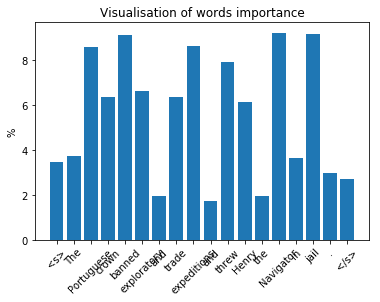

In [12]:
idx = randint(0, len(sentences))
_, _ = infersent.visualize(sentences[idx])

Vocab size : 500000


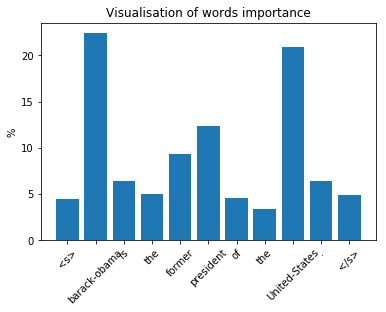

In [13]:
infersent.build_vocab_k_words(500000) # getting 500K words vocab
my_sent = 'barack-obama is the former president of the United-States.'
_, _ = infersent.visualize(my_sent)

# Try Train

In [ ]:
!python train_nli.py --encoder_path "../encoder/infersent1.pkl" --vocab_samples 500000 --model_version 1 --encoder_type 'InferSent' 

No cuda in use
cpu

togrep : ['--encoder_path', '../encoder/infersent1.pkl', '--vocab_samples', '500000', '--model_version', '1', '--encoder_type', 'InferSent']

Namespace(batch_size=64, dataset_path='../datasets/SNLI/', decay=0.99, dpout_fc=0.0, dpout_model=0.0, enc_lstm_dim=2048, encoder_path='../encoder/infersent1.pkl', encoder_type='InferSent', fc_dim=512, lrshrink=5, max_norm=5.0, minlr=1e-05, model_version=1, n_classes=3, n_enc_layers=1, n_epochs=20, nonlinear_fc=0, optimizer='sgd,lr=0.1', outputdir='output/', outputmodelname='model.pickle', pool_type='max', seed=1234, use_cuda=False, vector_rep='../GloVe/glove.840B.300d.txt', vocab_samples='500000')
Creation of the directory output//model.pickle failed
** TRAIN DATA : Found 549367 pairs of train sentences.
** DEV DATA : Found 9842 pairs of dev sentences.
** TEST DATA : Found 9824 pairs of test sentences.
Found 38957(/43479) words with glove vectors
Vocab size : 38957
Vocab size : 500000
========TEST encoder=======
/anaconda3/lib